<a href="https://colab.research.google.com/github/idrisselhouari/Dates-Types-Classification/blob/main/Using%20Colab%20to%20Curate%20and%20Upload%20a%20Dataset/ei_image_raw_uploader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification: Raw Uploader

[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ShawnHymel/computer-vision-with-embedded-machine-learning/blob/master/1.3.1%20-%20Using%20Colab%20to%20Curate%20and%20Upload%20a%20Dataset/ei_image_raw_uploader.ipynb)

Run this notebook to convert images to a single row of raw, normalized values (between 0 and 1) and upload them to Edge Impulse as raw samples. Note that pixel values will be normalized to be between 0 and 1.

Create a folder named "dataset" in the /content directory and upload your images there. The images should be divided into their respective classes, where each class has its own folder with the name of the class. For example:

<pre>
/content
    |- dataset
        |- background
        |- capacitor
        |- diode
        |- led
        |- resistor
</pre>

Author: EdgeImpulse, Inc.<br>
Date: June 6, 2021<br>
License: [Apache-2.0](apache.org/licenses/LICENSE-2.0)<br>

## Upload the data from Kaggle

In [2]:
!pip install kaggle

In [4]:
import os

# Create the .kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the kaggle.json file to the correct directory
os.rename('/content/kaggle.json', '/root/.kaggle/kaggle.json')


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets list  # List Kaggle datasets

ref                                                                    title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                                 14473  2025-03-19 03:51:40.270000           8848        144  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                                  20314  2025-02-18 06:50:24.370000          15188        268  1.0              
mahmoudelhemaly/students-grading-dataset                               Student Performance & Behavior Dataset                 520428  2025-02-17 17:38:46.653000          10892 

In [7]:
!kaggle competitions download -c open-data-day-2025-dates-types-classification

User cancelled operation


In [8]:
!unzip open-data-day-2025-dates-types-classification.zip -d open-data-day-2025-dates-types-classification

Archive:  open-data-day-2025-dates-types-classification.zip
replace open-data-day-2025-dates-types-classification/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Prepare the folder of the data

In [9]:
import pandas as pd

import os
import shutil

import warnings
warnings.filterwarnings('ignore')

In [10]:
BASE_PATH = "open-data-day-2025-dates-types-classification"

# Ensure the base path exists
if not os.path.exists(BASE_PATH):
    print("Correct your base path of your data!!")
else:
    # Construct the path for train_labels
    train_labels_path = os.path.join(BASE_PATH, "train_labels.csv")
    train_img_path = os.path.join(BASE_PATH, "train")

    # Check if train data & train_labels file exists
    if  not os.path.exists(train_img_path):
        print("Correct the train data path")

    elif not os.path.exists(train_labels_path):
        print("Correct your train labels file path!!")

    else:
        try:
            train_labels = pd.read_csv(train_labels_path)
            print(train_labels.head())
        except Exception as e:
            print(f"Error reading the file: {e}")


       filename label
0  feda0fb2.jpg  Ajwa
1  f10703e9.png  Ajwa
2  04cdb8ab.jpg  Ajwa
3  56fa4cc4.jpg  Ajwa
4  e17feef7.jpg  Ajwa


In [12]:
data_processed = "processed_data"

if not os.path.exists(data_processed):
    os.mkdir(data_processed)

for label in train_labels["label"].unique():
    print(f"Process the label {label}")

    label_dir = os.path.join(data_processed, label)
    if not os.path.exists(label_dir):
        os.mkdir(label_dir)

    for idx, img in enumerate(train_labels[train_labels["label"]==label]['filename']):
        img_path = os.path.join(train_img_path, img)

        if os.path.exists(img_path):
            shutil.copy(img_path, label_dir)
            print(f"the image {img} done")
        else:
            print(f"{idx} {img} didn't exist")

Process the label Ajwa
the image feda0fb2.jpg done
the image f10703e9.png done
the image 04cdb8ab.jpg done
the image 56fa4cc4.jpg done
the image e17feef7.jpg done
the image 55262933.jpg done
the image bf3fad35.jpg done
the image 92ce537b.png done
the image eb6cf482.jpg done
the image 7568324d.jpg done
the image a1d3ec0f.jpg done
the image 3c8e617a.jpg done
the image 73b05b0f.jpg done
the image 9cb951b7.jpg done
the image bdaed8f6.jpg done
the image 43ec30dd.jpg done
the image 6f3c3c10.jpg done
the image 1e26107e.jpg done
the image 04087ada.jpg done
the image 359f76de.jpg done
the image 63d9c945.jpg done
the image a8d991ee.jpg done
the image e8e52de5.jpg done
the image 688a6e4f.jpg done
the image 5a833aad.jpg done
the image 06c16477.jpg done
the image ed207962.jpg done
the image 1beaa998.jpg done
the image a715a5e6.jpg done
the image d27843db.jpg done
the image 56ad94dd.jpg done
the image 3c6b32f6.jpg done
the image 508fcc81.jpg done
the image 33a1db8a.jpg done
the image 803e8b1a.jpg do

## Load the data into Edge Impulse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import random, os, PIL, json, time, hmac, hashlib, requests, threading, queue

from skimage.transform import resize                      # Used to scale/resize image arrays

In [14]:
### Settings

# Edge Impulse > your_project > Dashboard > Keys
EI_API_KEY = "ei_0f4841b145e2bdc3e8505dbbaf60f269326c793e81e501155ad33cd20c417071"
EI_HMAC_KEY = "7da27d30dcd2141bdd3a71f1e9686f76"

# Number of threads to run to upload data to Edge Impulse
NUM_THREADS = 20

# Location of dataset
DATASET_PATH = "/content/dataset"

# Desired resolution of images
TARGET_WIDTH = 224
TARGET_HEIGHT = 224

# Invert image (dark backgrounds can sometimes improve accuracy)
INVERT = False

# Set aside 20% for test set (Edge Impulse automatically extracts validation set during training)
TEST_RATIO = 0.2

# You are welcome to change the seed to try a different validation set split
random.seed(42)

## Curate Image Dataset

The following cells perform the following:
 * Load images from filesystem as grayscale values
 * Set aside some portion of the dataset as test data
 * Resize images
 * Normalize pixel value from [0, 255] to [0.0, 1.0]
 * Flatten images to 1D array

In [15]:
### Load images as Numpy arrays

# We want to record the labels and assign a ground truth label as a number to each sample
labels = []
y_all = []    # Lowercase 'y' - 1D vector of the ground truth labels (n)
X_all = []    # Uppercase 'X' - 3D array of all image samples (n x width x height)

# Find the directories in the dataset folder (skip the Jupyter Notebook checkpoints hidden folder)
for label in os.listdir(DATASET_PATH):
  class_dir = os.path.join(DATASET_PATH, label)
  if os.path.isdir(class_dir) and label != ".ipynb_checkpoints":

    # Add the name of the folder to our labels list
    labels.append(label)

    # Go through each image in the folder
    for i, file in enumerate(os.listdir(class_dir)):

      # Skip the Jupyter Notebook checkpoints folder that sometimes gets added
      if file != ".ipynb_checkpoints":

        # Open image and convert to grayscale
        file_path = os.path.join(class_dir, file)
        img = PIL.Image.open(file_path)

        # Convert the image to a Numpy array, optionally invern, and append to X
        img_array = np.asarray(img)
        if INVERT:
          img_array = 255 - img_array
        X_all.append(img_array)

        # Add label to the y array
        y_all.append(label)

    # Show how many images we loaded
    print("Added", str(i + 1), "images from", label)

# Calculate total number of samples
num_samples = len(X_all)

# Sort the labels list by alphabetical order
labels = sorted(labels)

# Print out labels and number of samples
print(labels)
print("Number of samples:", num_samples)

Added 85 images from Sokari
Added 44 images from Medjool
Added 72 images from Meneifi
Added 72 images from Ajwa
Added 48 images from Sugaey
Added 53 images from Nabtat Ali
Added 58 images from Shaishe
['Ajwa', 'Medjool', 'Meneifi', 'Nabtat Ali', 'Shaishe', 'Sokari', 'Sugaey']
Number of samples: 432


In [16]:
### Shuffle samples and labels together, divide into test and training sets

# Shuffle samples and associated labels together
X_y = list(zip(X_all, y_all))
random.shuffle(X_y)
X_all, y_all = zip(*X_y)

# Calculate number of validation and test samples to put aside (round down)
num_samples_test = int(TEST_RATIO * num_samples)

# The first `num_samples_test` samples of the shuffled list becomes the test set
X_test = X_all[:num_samples_test]
y_test = y_all[:num_samples_test]

# The remaining samples become the training set
X_train = X_all[num_samples_test:]
y_train = y_all[num_samples_test:]

# Remember the number of samples in the test set
num_samples_train = len(X_train)

# Print out the number of test and training samples
print("Number of test samples:", num_samples_test)
print("Number of training samples:", num_samples_train)

Number of test samples: 86
Number of training samples: 346


Label: Medjool
[[[228 226 227]
  [229 227 228]
  [232 228 229]
  ...
  [237 232 229]
  [236 232 229]
  [235 231 228]]

 [[229 227 228]
  [229 227 228]
  [231 227 228]
  ...
  [236 232 231]
  [236 232 231]
  [235 231 230]]

 [[231 227 228]
  [231 227 228]
  [231 227 228]
  ...
  [236 232 231]
  [236 232 231]
  [236 232 231]]

 ...

 [[231 226 232]
  [231 226 232]
  [230 225 231]
  ...
  [231 229 230]
  [232 230 231]
  [231 229 230]]

 [[231 226 230]
  [230 225 229]
  [229 224 228]
  ...
  [233 229 230]
  [232 230 231]
  [232 230 231]]

 [[232 227 231]
  [231 226 230]
  [228 226 229]
  ...
  [232 228 229]
  [232 228 229]
  [234 230 231]]]


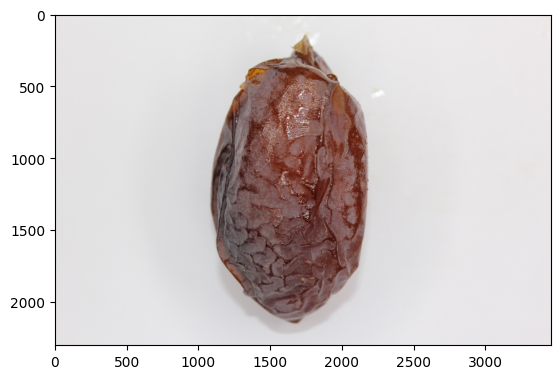

In [17]:
### View one of the training samples

# Chose which sample you want to view
idx = 0

# Print out label (numbe and string) and part of the array
print("Label: " + y_train[idx])
print(X_train[idx])

# Display image from array
plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=255)

In [1]:
### Function to resize list of images
def resize_images(images, width, height, anti_aliasing=True):
  """
  Prove a list of Numpy arrays (in images parameter) to have them all resized to desired height and
  width. Returns the list of newly resized image arrays.

  NOTE: skimage resize returns *normalized* image arrays (values between 0..1)
  """
  X_out = []
  for i, img in enumerate(images):
    X_out.append(resize(img, (height, width), anti_aliasing=anti_aliasing))
  return X_out

In [2]:
### Scale/crop images (Note: also normalizes data to 0..1)

# Resize (scale) all images in the training set
X_train = resize_images(X_train, TARGET_WIDTH, TARGET_HEIGHT)

# Resize (scale) all images in the test set
X_test = resize_images(X_test, TARGET_WIDTH, TARGET_HEIGHT)

NameError: name 'X_train' is not defined

In [ ]:
### View training sample again (after they all have been scaled)

# Chose which sample you want to view
idx = 0

# Print out label (numbe and string) and part of the array
print("Label: " + y_train[idx])
print("First row:", X_train[idx][:1,:])

# Display image from array (note that images have been normalized)
plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=1)

In [ ]:
### Convert list of samples into Numpy arrays

# Convert sets
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# Print out the new Numpy array shapes (always a good idea to check the shapes!)
print("Training X:", X_train.shape)
print("Test X:", X_test.shape)

In [ ]:
### Flatten each image to a 1D vector (DNN requires 1D input)

# Compute length of 1D array that we will flatten each image to
len_vector = TARGET_WIDTH * TARGET_WIDTH

# Flatten matricies to vectors
X_train = X_train.reshape(num_samples_train, len_vector)
X_test = X_test.reshape(num_samples_test, len_vector)

# Print out the new Numpy array shapes (always a good idea to check the shapes!)
print("Training X:", X_train.shape)
print("Test X:", X_test.shape)

## Helper Functions

The following functions are used to assist in task of uploading samples to your Edge Impulse project.

In [ ]:
def create_json_wrapper():
  """
  Construct initial JSON wrapper as a template
  """

  # Start with all zeros. Hs256 gives 32 bytes and we encode in hex. So, we need 64 characters here.
  empty_signature = ''.join(['0'] * 64)

  # Create JSON wrapper for data
  data = {
      "protected": {
          "ver": "v1",
          "alg": "HS256",
          "iat": time.time()                  # Epoch time, seconds since 1970
      },
      "signature": empty_signature,
      "payload": {
          "device_type": "pre-made",          # Pre-made dataset (not collected)
          "interval_ms": 1,                   # Pretend it's interval of 1 ms
          "sensors": [
              { "name": "img", "units": "B" } # Unitless ("Byte" data)
          ],
          "values": []
      }
  }

  return data

In [ ]:
def send_sample(data, label, test_set=False):
  """
  Send raw data sample to Edge Impulse project, return HTTP status code
  """

  # Encode message in JSON format
  encoded = json.dumps(data)

  # Sign message
  signature = hmac.new(bytes(EI_HMAC_KEY, 'utf-8'),
                      msg = encoded.encode('utf-8'),
                      digestmod = hashlib.sha256).hexdigest()

  # Set the signature in the message and encode data again to JSON format
  data['signature'] = signature
  encoded = json.dumps(data)

  # Construct URL based on dataset being sent
  if test_set:
    url = 'https://ingestion.edgeimpulse.com/api/testing/data'
  else:
    url = 'https://ingestion.edgeimpulse.com/api/training/data'

  # Upload the data to project
  res = requests.post(url=url,
                      data=encoded,
                      headers={
                          'Content-Type': 'application/json',
                          'x-file-name': str(label),
                          'x-api-key': EI_API_KEY
                      })

  return res

In [ ]:
def upload_sample(len_vector, is_test_set):
  """
  Pull sample and label from queue and send to Edge Impulse server. To be called within a thread.
  """

  global q

  while not q.empty():

    # Start with empty JSON wrapper
    data = create_json_wrapper()

    # Fill up values field (we need to convert to float to avoid JSON error)
    sample, label = q.get()
    for j in range(len_vector):
      data['payload']['values'].append(float(sample[j]))

    # Send sample
    res = send_sample(data, label, test_set=is_test_set)

    # Check response code
    if (res.status_code != 200):
      print("Failed to upload file to Edge Impulse", res.status_code, res.content)

## Upload training and test sets to Edge Impulse

In [ ]:
### Use many threads to send training data and labels to Edge Impulse project

# Fill queue with training data and labels
q = queue.Queue()
for i in range(num_samples_train):
  q.put((X_train[i], y_train[i]))

# Create and start threads
threads = []
for i in range(NUM_THREADS):
  threads.append(threading.Thread(target=upload_sample, args=(len_vector, False)))
  threads[i].start()

# Wait for threads to be done
for thread in threads:
  thread.join()

In [ ]:
### Use many threads to send test data and labels to Edge Impulse project

# Fill queue with test data and labels
q = queue.Queue()
for i in range(num_samples_test):
  q.put((X_test[i], y_test[i]))

# Create and start threads
threads = []
for i in range(NUM_THREADS):
  threads.append(threading.Thread(target=upload_sample, args=(len_vector, True)))
  threads[i].start()

# Wait for threads to be done
for thread in threads:
  thread.join()